In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from glob import glob
import numpy as np

from scipy.ndimage import gaussian_filter1d as smooth


In [2]:
region = 'itc'

data = {'itc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []},
        'pfc': {'fac': [], 'bod': [], 'art': [], 'nat': [], 'fac0': [], 'bod0': [], 'art0': [], 'nat0': []}}

for fname in glob('G:\Results\SUA\dec\c-ovr-final\c-ovr-r-*-dpr.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            data[region][category].append(np.mean(dpr[region][category], 0))

for fname in glob('G:\Results\SUA\dec\c-ovr-final\c-ovr-p-*-dpr.pickle'):
    with open(fname, 'rb') as handler:
        dpr = pickle.load(handler)

    for region in ['itc', 'pfc']:
        for category in ['fac', 'bod', 'art', 'nat']:
            data[region][category+"0"].append(np.mean(dpr[region][category], 0))

for region in ['itc', 'pfc']:
    for key in data[region].keys():
        data[region][key] = np.array(data[region][key])

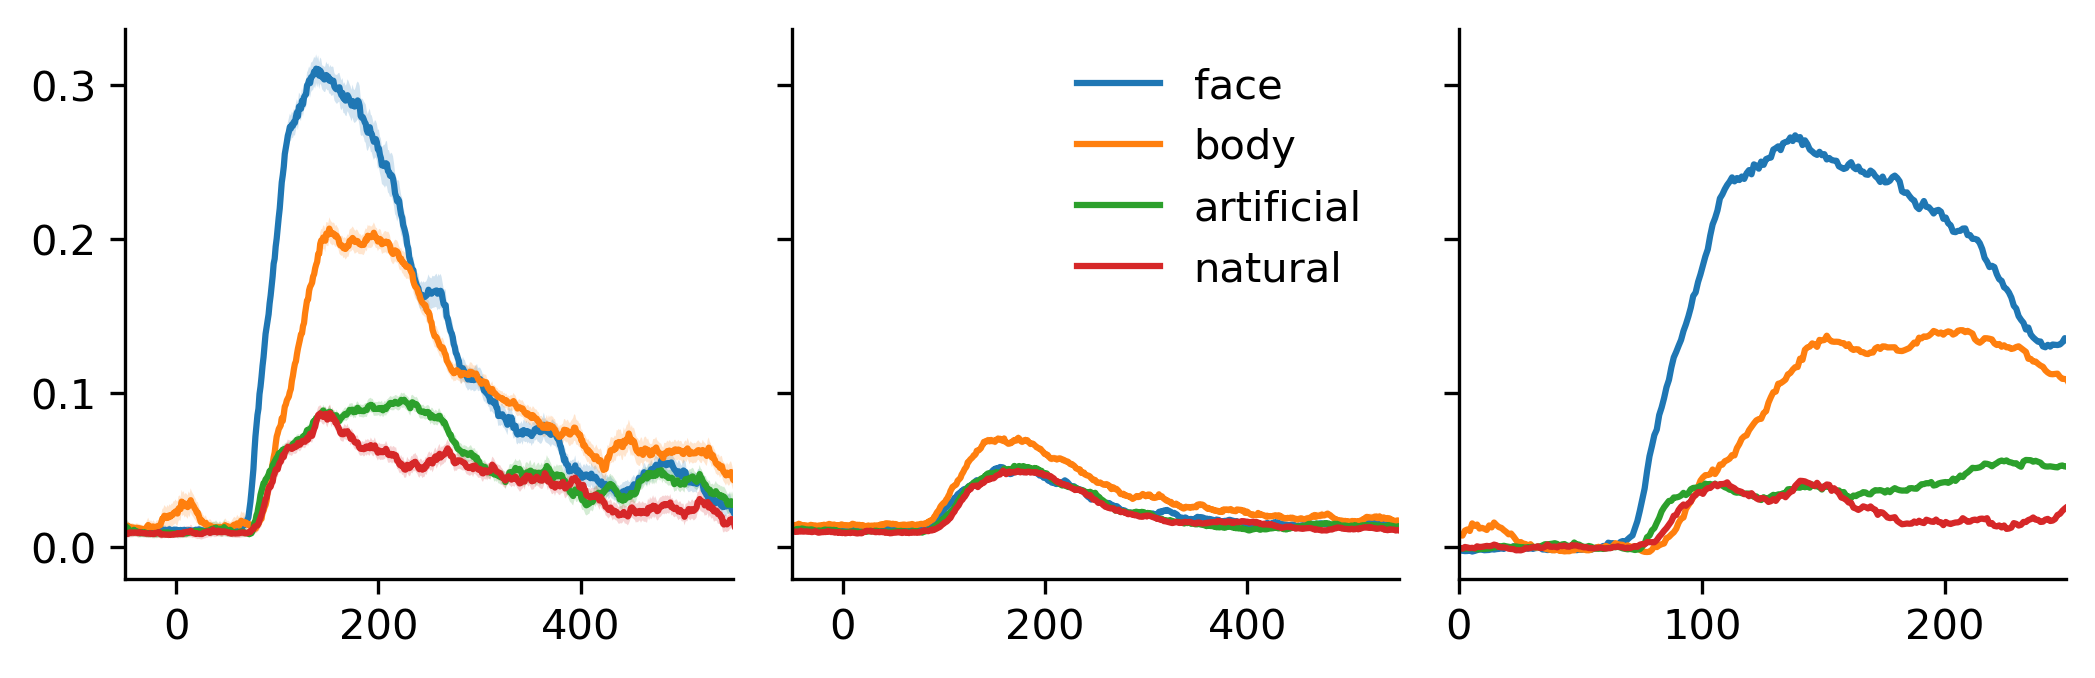

In [3]:
cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(1, 3, figsize=(18 * cm, 6 * cm), dpi=300, sharey=True)

region = 'itc'
for category in ['fac', 'bod', 'art', 'nat']:
    m = np.array(data[region][category])
    m0 = np.array(data[region][category+"0"])

    # m -= m[:, (tim > -50) & (tim < 0)].mean(1).reshape(-1, 1)
    # m = smooth(m, sigma=10)
    
    axs[0].plot(tim, m.mean(0))
    axs[0].fill_between(tim, m.mean(0) + m.std(0), m.mean(0) - m.std(0), alpha=.2, label='_nolegend_')

    axs[1].plot(tim, m0.mean(0))
    axs[1].fill_between(tim, m0.mean(0) + m0.std(0), m0.mean(0) - m0.std(0), alpha=.2, label='_nolegend_')

    axs[2].plot(tim, m.mean(0) - m0.mean(0))


for ax in axs:
    ax.set_xlim(-50, 550)
axs[2].set_xlim(0, 250)
axs[1].legend(['face', 'body', 'artificial', 'natural'], frameon=False)
sns.despine()
fig.tight_layout()

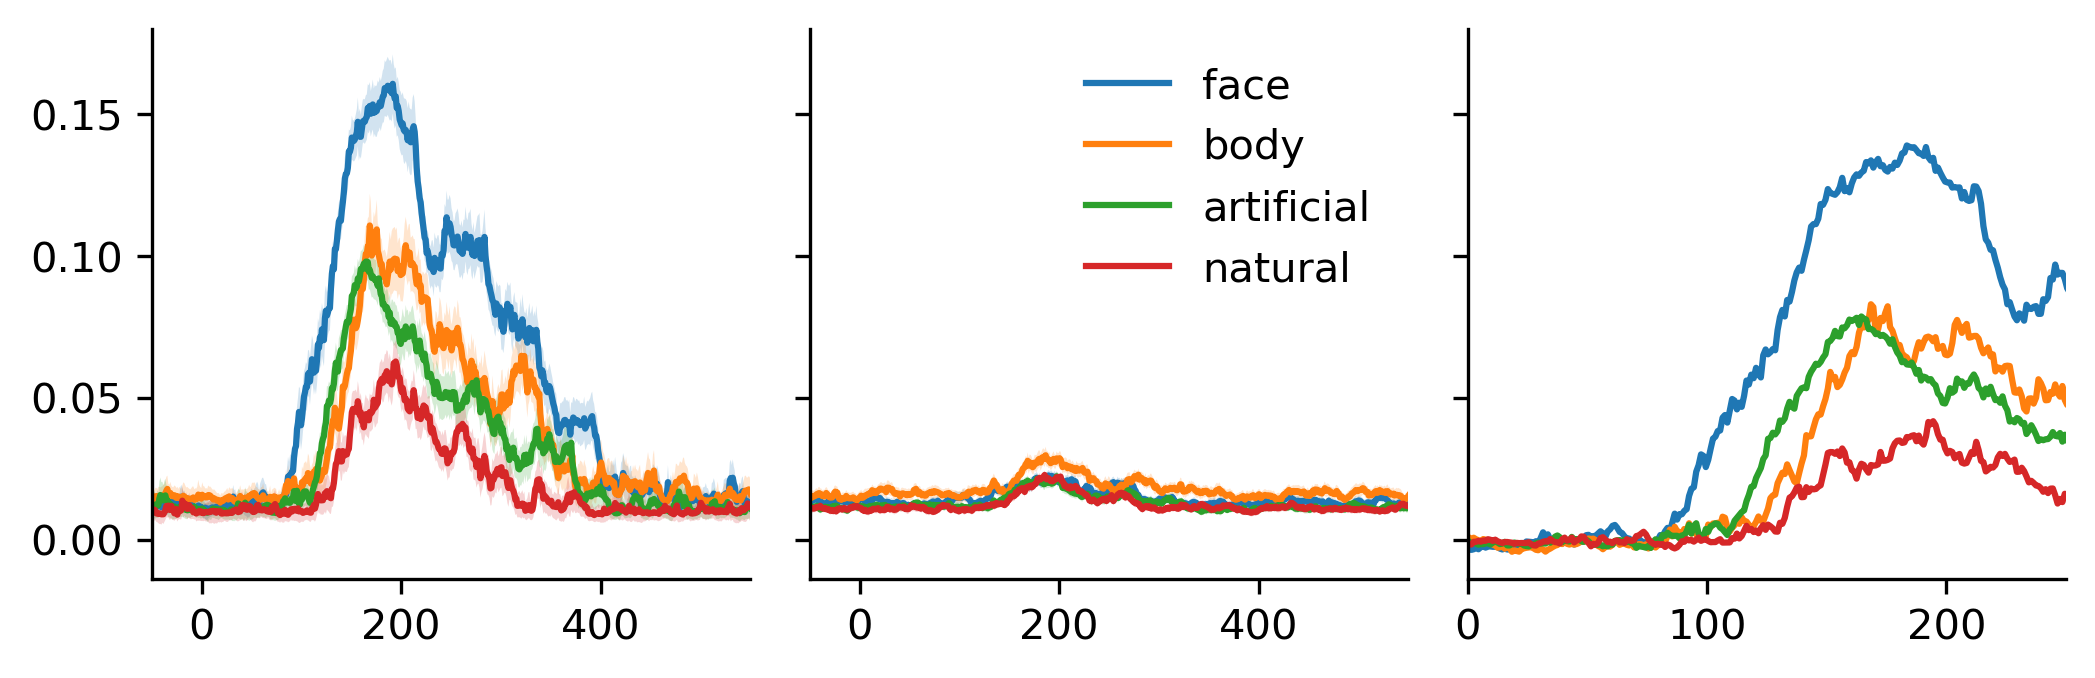

In [4]:
cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(1, 3, figsize=(18 * cm, 6 * cm), dpi=300, sharey=True)

region = 'pfc'
for category in ['fac', 'bod', 'art', 'nat']:
    m = np.array(data[region][category])
    m0 = np.array(data[region][category+"0"])
    
    axs[0].plot(tim, m.mean(0))
    axs[0].fill_between(tim, m.mean(0) + m.std(0), m.mean(0) - m.std(0), alpha=.2, label='_nolegend_')

    axs[1].plot(tim, m0.mean(0))
    axs[1].fill_between(tim, m0.mean(0) + m0.std(0), m0.mean(0) - m0.std(0), alpha=.2, label='_nolegend_')

    axs[2].plot(tim, m.mean(0) - m0.mean(0))

for ax in axs:
    ax.set_xlim(-50, 550)
axs[2].set_xlim(0, 250)
axs[1].legend(['face', 'body', 'artificial', 'natural'], frameon=False)
sns.despine()
fig.tight_layout()

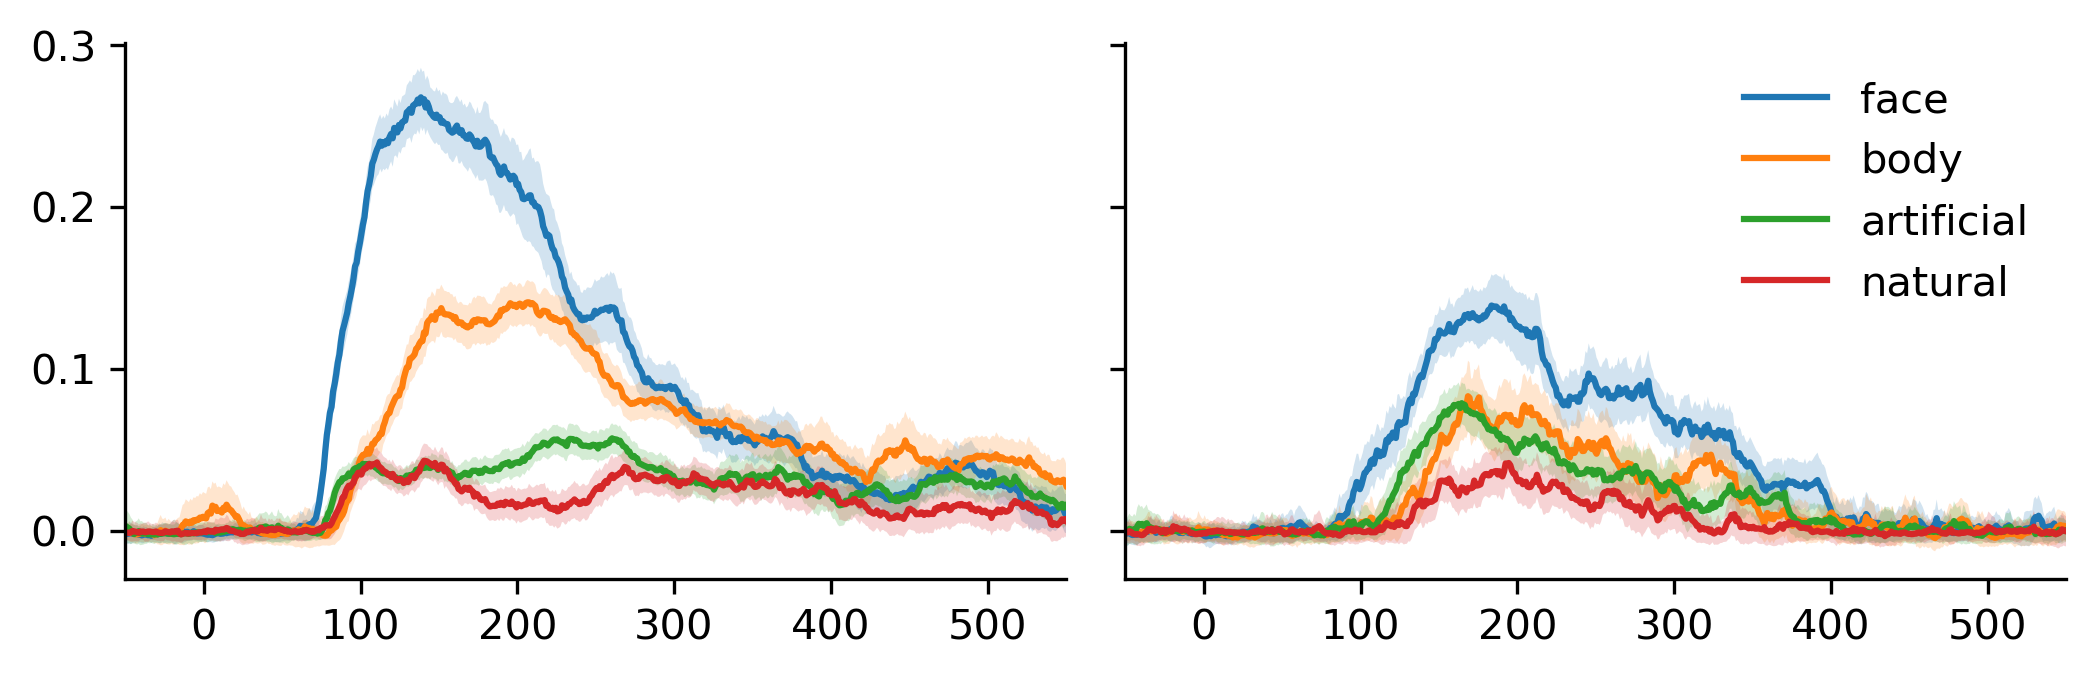

In [5]:
cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(1, 2, figsize=(18 * cm, 6 * cm), dpi=300, sharey=True)

for category in ['fac', 'bod', 'art', 'nat']:
    mi = data['itc'][category] - data['itc'][category+"0"].mean(0)
    mp = data['pfc'][category] - data['pfc'][category+"0"].mean(0)
    
    axs[0].plot(tim, mi.mean(0))
    axs[0].fill_between(tim, mi.mean(0) + 1.96 * mi.std(0), mi.mean(0) - 1.96 * mi.std(0), alpha=.2, label='_nolegend_')

    axs[1].plot(tim, mp.mean(0))
    axs[1].fill_between(tim, mp.mean(0) + 1.96 * mp.std(0), mp.mean(0) - 1.96 * mp.std(0), alpha=.2, label='_nolegend_')

for ax in axs:
    ax.set_xlim(-50, 550)
axs[1].legend(['face', 'body', 'artificial', 'natural'], frameon=False)
sns.despine()
fig.tight_layout()

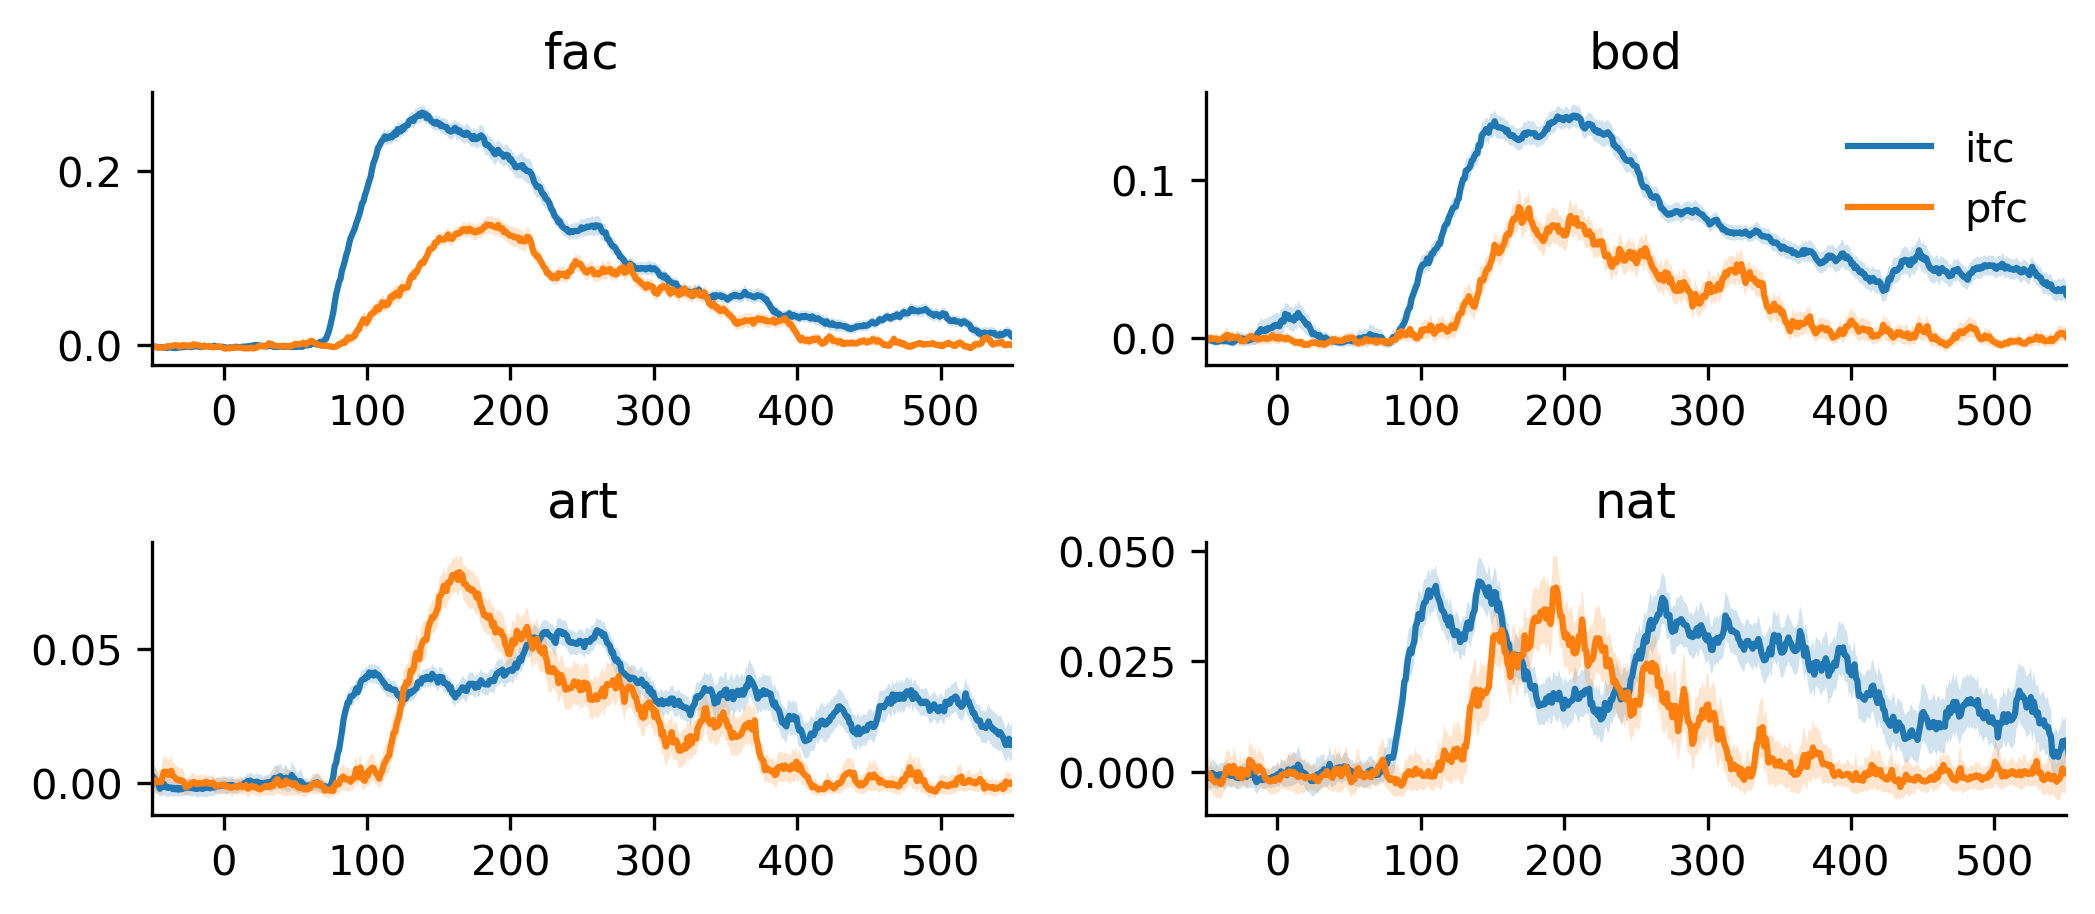

In [6]:
cm = 1 / 2.54
tim = np.arange(-200, 675) + 12.5
fig, axs = plt.subplots(2, 2, figsize=(18 * cm, 8 * cm), dpi=300, sharey=False)
axs = axs.flatten()

for ax, category in zip(axs, ['fac', 'bod', 'art', 'nat']):
    mi = data['itc'][category] - data['itc'][category+"0"].mean(0)
    mp = data['pfc'][category] - data['pfc'][category+"0"].mean(0)

    # mi = data['itc'][category]
    # mp = data['pfc'][category]

    # mi = smooth(mi, sigma=3)
    # mp = smooth(mp, sigma=3)
    
    ax.plot(tim, mi.mean(0))
    ax.fill_between(tim, mi.mean(0) + mi.std(0), mi.mean(0) - mi.std(0), alpha=.2, label='_nolegend_')

    ax.plot(tim, mp.mean(0))
    ax.fill_between(tim, mp.mean(0) + mp.std(0), mp.mean(0) - mp.std(0), alpha=.2, label='_nolegend_')

    ax.set_title(category)

for ax in axs:
    ax.set_xlim(-50, 550)
axs[1].legend(['itc', 'pfc'], frameon=False)
sns.despine()
fig.tight_layout()

In [7]:
def fonsets(tim, m, nsw: int=5):
    onsets = []
    
    bl = (tim < 10) & (tim >= -10)

    for rep in range(m.shape[0]):
        rm = m[rep, :]
        rm -= rm[bl].mean()

        maxv = rm[(tim > 50) & (tim < 250)].max()
        thresh = 0.15 * (maxv)
        ht = rm > thresh
        cht = np.convolve(ht, np.ones(nsw), 'same') == nsw

        cht[tim<50] = 0

        onsets.extend(tim[np.argwhere(cht)[0] - nsw])
    return np.array(onsets)

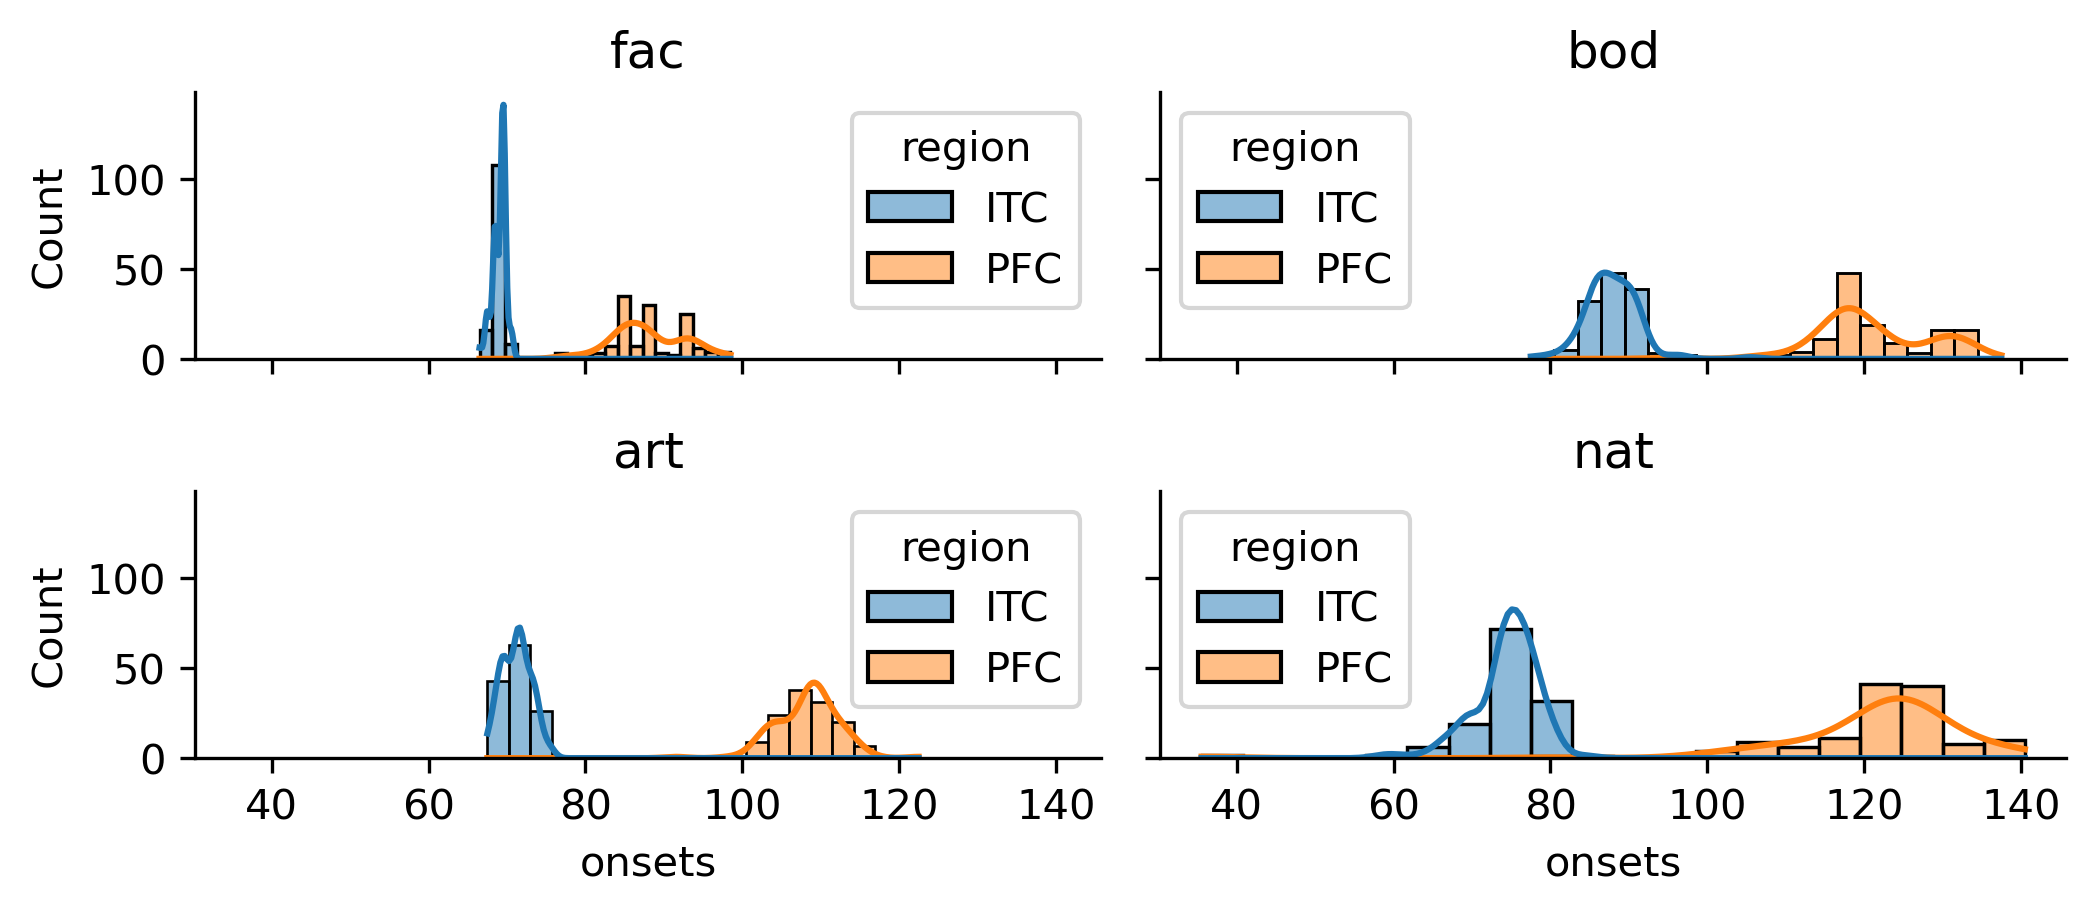

In [8]:
cm = 1 / 2.54
fig, axs = plt.subplots(2, 2, figsize=(18 * cm, 8 * cm), dpi=300, sharex=True, sharey=True)
axs = axs.flatten()

for ax, category in zip(axs, ['fac', 'bod', 'art', 'nat']):

      X_itc = data['itc'][category] - data['itc'][category+"0"].mean(0)
      X_pfc = data['pfc'][category] - data['pfc'][category+"0"].mean(0)

      nsw = 15

      itc_onsets = fonsets(tim, X_itc, nsw)
      pfc_onsets = fonsets(tim, X_pfc, nsw)

      df = {'onsets': np.concatenate([itc_onsets, pfc_onsets]),
            'region': np.concatenate([np.full(np.shape(itc_onsets), 'ITC', dtype=object), 
                  np.full(np.shape(pfc_onsets), 'PFC', dtype=object)])}

      h = sns.histplot(data=df, x='onsets', hue='region', ax=ax, element='bars', kde=True, bins=20)
      # ax.legend(frameon=False)
      ax.set_title(category)

sns.despine()
fig.tight_layout()

In [9]:
import pandas as pd

for iter, category in enumerate(['fac', 'bod', 'art', 'nat']):

    X_itc = data['itc'][category] - data['itc'][category+"0"].mean(0)
    X_pfc = data['pfc'][category] - data['pfc'][category+"0"].mean(0)

    nsw = 15

    itc_onsets = fonsets(tim, X_itc, nsw)
    pfc_onsets = fonsets(tim, X_pfc, nsw)

    if iter==0:
        df = pd.DataFrame(
            {'onsets': np.concatenate([itc_onsets, pfc_onsets]),
             'region': np.concatenate([np.full(np.shape(itc_onsets), 'ITC', dtype=object), 
                                       np.full(np.shape(pfc_onsets), 'PFC', dtype=object)]),
             'category': category})
    else:
        _df = pd.DataFrame({
            'onsets': np.concatenate([itc_onsets, pfc_onsets]),
            'region': np.concatenate([np.full(np.shape(itc_onsets), 'ITC', dtype=object), 
                                      np.full(np.shape(pfc_onsets), 'PFC', dtype=object)]),
            'category': category})
        df = pd.concat((df, _df), ignore_index=True)

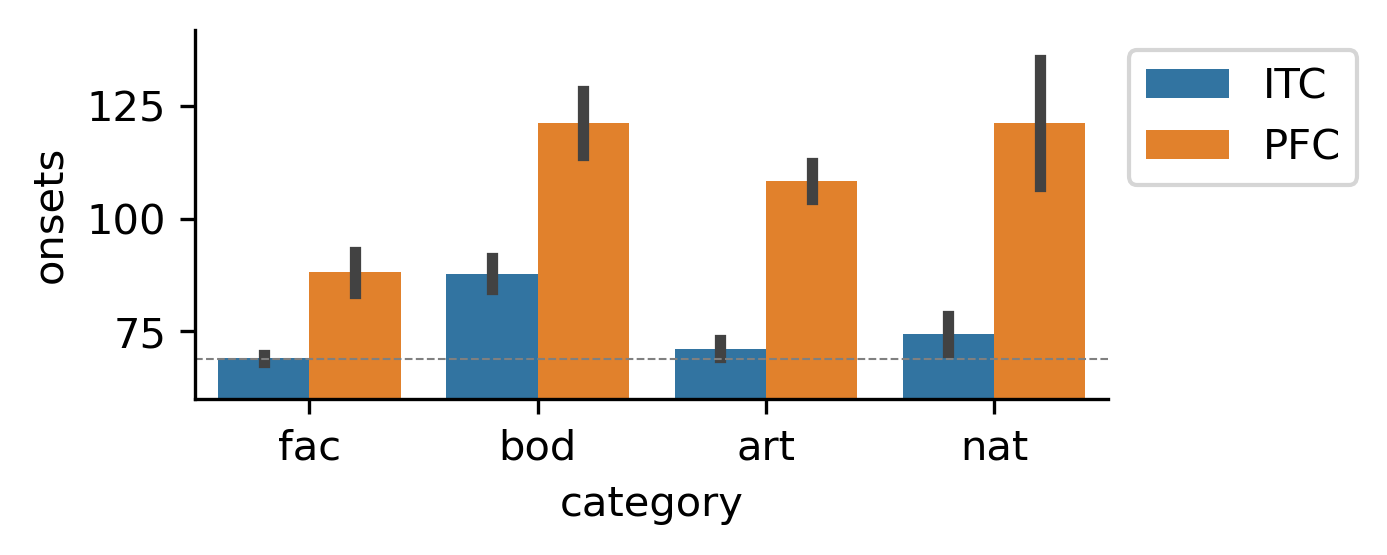

In [10]:
cm = 1 / 2.54
fig, axs = plt.subplots(1, 1, figsize=(12 * cm, 5 * cm), dpi=300)

barplot = sns.barplot(data=df, x='category', y='onsets', hue='region', ci='sd')
barplot.legend (bbox_to_anchor = (1, 1))
axs.axhline(69, c='gray', ls='--', lw=.5)
axs.set_ylim(60, axs.get_ylim()[1])
sns.despine()
fig.tight_layout()

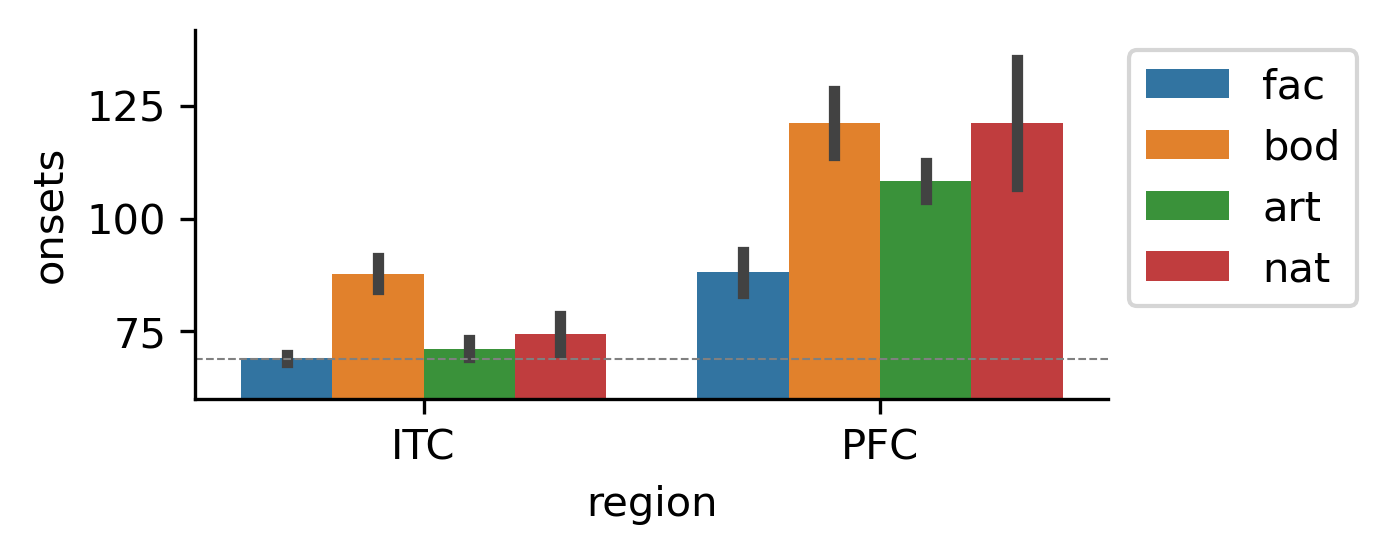

In [11]:
cm = 1 / 2.54
fig, axs = plt.subplots(1, 1, figsize=(12 * cm, 5 * cm), dpi=300)

barplot = sns.barplot(data=df, hue='category', y='onsets', x='region', ci='sd')
barplot.legend (bbox_to_anchor = (1, 1))
axs.axhline(69, c='gray', ls='--', lw=.5)
axs.set_ylim(60, axs.get_ylim()[1])
sns.despine()
fig.tight_layout()

In [12]:
category = 'nat'

x1 = df[(df.region=='ITC') & (df.category==category)].onsets.to_numpy()
x2 = df[(df.region=='PFC') & (df.category==category)].onsets.to_numpy()

print(f"p-value for {category}: {1 - np.mean(((x2 - x1.reshape(-1, 1)) > 0))}")

p-value for nat: 0.015495867768595017


In [13]:
category1 = 'art'
category2 = 'fac'
region = 'ITC'


x1 = df[(df.region==region) & (df.category==category1)].onsets.to_numpy()
x2 = df[(df.region==region) & (df.category==category2)].onsets.to_numpy()

print(f"p-value for {category2} > {category1}: {1 - np.mean(((x2 - x1.reshape(-1, 1)) > 0))} ({region})")

p-value for fac > art: 0.9065656565656566 (ITC)


In [14]:
# cm = 1 / 2.54
# fig, axs = plt.subplots(1, 1, figsize=(18 * cm, 9 * cm), dpi=300)

# sns.histplot(data=df, x='onsets', hue='region', col='category')
# sns.despine()
# fig.tight_layout()

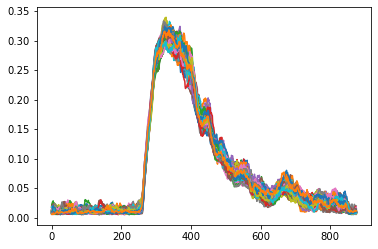

In [16]:
from matplotlib import pyplot as plt
plt.plot(data['itc']['fac'].T);